In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 20)
        self.fc4 = nn.Linear(20, 20)
        self.fc5 = nn.Linear(20, 20)
        self.fc6 = nn.Linear(20, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        #x = F.relu(self.fc6(x))
        x = self.fc6(x)
        return F.log_softmax(x)
        #return F.softmax(x)
        
def plot_decision_boundary(clf, X, y):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    #plt.savefig(filename)
    #plt.close()

In [11]:
# Q1

In [ ]:
#(a)

In [12]:
data = pd.read_csv("XOR.csv") # UPDATE THE FILE NAME AND PATH TO MATCH YOUR REQUIREMENT
X = data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)

/software/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel/__main__.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 Loss  0.7158610224723816
Training accuracy is  0.5
Epoch  100 Loss  0.6924201250076294
Training accuracy is  0.75
Epoch  200 Loss  0.6910628080368042
Training accuracy is  0.75
Epoch  300 Loss  0.6783894896507263
Training accuracy is  0.75
Epoch  400 Loss  0.2591230273246765
Training accuracy is  1.0


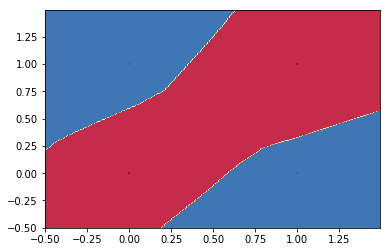

In [16]:
# train
net = Net()
# create a stochastic gradient descent optimizer
learning_rate = .01
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

#optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

nepochs = 10000
data, target = X, y
# run the main training loop
for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 100 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        print('Training accuracy is ', accuracy)
        if accuracy == 1:
            plot_decision_boundary(net, X, y)
            break

In [ ]:
# (b)

/software/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel/__main__.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 Loss  0.6938023567199707
Training accuracy is  0.5
Epoch  100 Loss  0.6924596428871155
Training accuracy is  0.5
Epoch  200 Loss  0.6909971237182617
Training accuracy is  0.5
Epoch  300 Loss  0.6861717700958252
Training accuracy is  0.5
Epoch  400 Loss  0.6421478986740112
Training accuracy is  0.75
Epoch  500 Loss  0.05388110876083374
Training accuracy is  1.0
Epoch  600 Loss  0.008755654096603394
Training accuracy is  1.0
Epoch  700 Loss  0.003958761692047119
Training accuracy is  1.0
Epoch  800 Loss  0.002373993396759033
Training accuracy is  1.0
Epoch  900 Loss  0.0016303658485412598
Training accuracy is  1.0
Epoch  1000 Loss  0.0012107491493225098
Training accuracy is  1.0
Epoch  1100 Loss  0.0009469389915466309
Training accuracy is  1.0
Epoch  1200 Loss  0.0007683634757995605
Training accuracy is  1.0
Epoch  1300 Loss  0.0006406903266906738
Training accuracy is  1.0
Epoch  1400 Loss  0.0005456209182739258
Training accuracy is  1.0
Epoch  1500 Loss  0.0004724860191345215
T

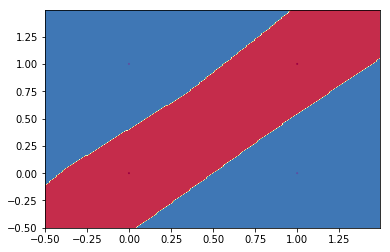

In [6]:
# train
net = Net()
# create a stochastic gradient descent optimizer
learning_rate = .01
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

#optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

nepochs = 10000
data, target = X, y
# run the main training loop
for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 100 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        print('Training accuracy is ', accuracy)
        if loss < 0.0001:
            plot_decision_boundary(net, X, y)
            break

In [ ]:
# (c)

In [7]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 2)
        #self.fc2 = nn.Linear(8, 8)
        #self.fc3 = nn.Linear(20, 20)
        #self.fc4 = nn.Linear(20, 20)
        #self.fc5 = nn.Linear(20, 20)
        self.fc6 = nn.Linear(2, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        #x = F.relu(self.fc3(x))
        #x = F.relu(self.fc4(x))
        #x = F.relu(self.fc5(x))
        #x = F.relu(self.fc6(x))
        x = self.fc6(x)
        return F.log_softmax(x)
        #return F.softmax(x)
        
def plot_decision_boundary(clf, X, y):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    #plt.savefig(filename)
    #plt.close()

In [8]:
data = pd.read_csv("XOR.csv") # UPDATE THE FILE NAME AND PATH TO MATCH YOUR REQUIREMENT
X = data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)

/software/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel/__main__.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 Loss  0.7421835064888
Training accuracy is  0.5
Epoch  100 Loss  0.686948299407959
Training accuracy is  0.5
Epoch  200 Loss  0.629418671131134
Training accuracy is  0.75
Epoch  300 Loss  0.519696831703186
Training accuracy is  0.75
Epoch  400 Loss  0.48579806089401245
Training accuracy is  0.75
Epoch  500 Loss  0.44618895649909973
Training accuracy is  0.75
Epoch  600 Loss  0.2386437952518463
Training accuracy is  1.0


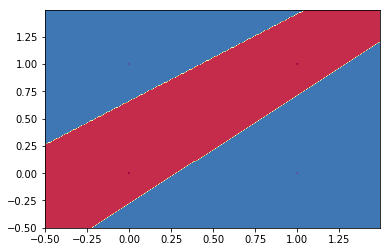

In [9]:
# train
net = Net()
# create a stochastic gradient descent optimizer
learning_rate = .01
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

#optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

nepochs = 10000
data, target = X, y
# run the main training loop
for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 100 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        print('Training accuracy is ', accuracy)
        if accuracy == 1:
            plot_decision_boundary(net, X, y)
            break

In [ ]:
# The number of hidden layer = 1
# The number of neurons in each hidden layer = 2